# 1 - Introducción:
Se ha desarrollado una aplicación que genera y valida código con el modelo de inteligencia artificial StarCoder. El usuario introduce un código o funcionalidades de este y el modelo genera el código solicitado o corrige aquel que le ha pasado el usuario.

# 2 - Objetivo:

+ Generar código funcional basado en la descripción que le pasa el usuario
+ Mejorar código pre-exixstente.
+ Detectar errores en el código
+ Corregir errores en el código

# 3 - Metodología:
+ Se implementa a través de una interfaz web usado la biblioteca Gradio. Se elige esta por su facilidad de integración con Colab, donde está pensado que se ejecute el notebook.
+ Se hacen diferentes pruebas para evaluar el desempeño del modelo basadas en las funcionalidades de este.
+ Se documentan los resultados a través de captura de pantalla realizadas a los resultados obtenidos en las pruebas.

# 4 - Resultados
## 4.1 - Prueba 1: Generación de código desde una descripción
**Prompt usado**: "Escribe una función en Python para calcular el factorial de un número."
**Salida genrada**:
```
import numpy as np

def factorial(n):
    '''
    factorial(numero) --> retorna el factorial de un número n

    :param numero: numero positivo entero (int)
    :return fact: el factorial del número (float)
    '''
    
    if n<=0:
        return 0
    elif n==1:
        return 1.0

    fact = 1.0 # valor de factorial
    while n>1:
        fact *= n
        n=n-1 # decremento n en 1

    return fact

print(factorial(5))  
```      

**Imagen resultado prueba 1**:

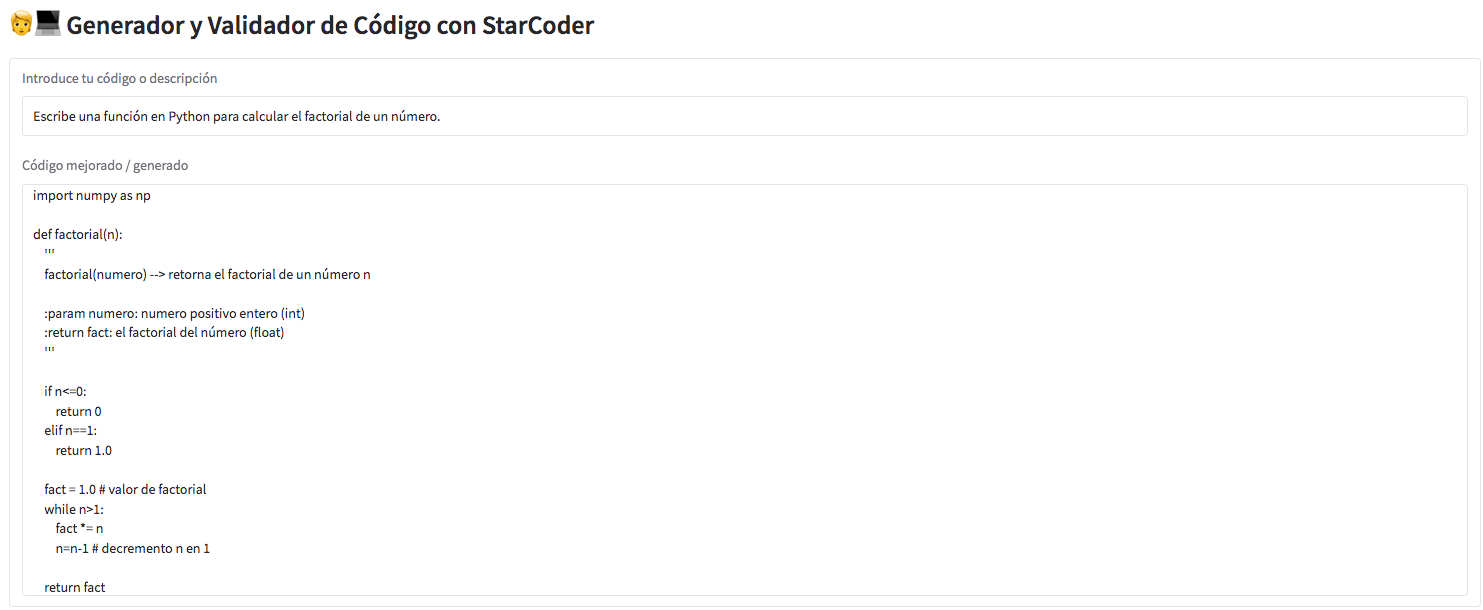

## 4.2 - Prueba 2: Optimización de código
**Prompt usado**:
```
function bubbleSort(arr) {
    for (let i = 0; i < arr.length; i++) {
        for (let j = 0; j < arr.length - i - 1; j++) {
            if (arr[j] > arr[j + 1]) {
                let temp = arr[j];
                arr[j] = arr[j + 1];
                arr[j + 1] = temp;
            }
        }
    }
    return arr;
}
```
Este código ordena una lista en JavaScript.


**Salida genrada**:
```
function quickSort(arr) {
    if (arr.length < 2) {
        return 0;
    }

    const pivot = arr.pop();
    let right = [];
    let left = [];

    for (let i = 0; i < arr.length; i++) {
        if (arr[i] < pivot) {
            left.push(arr[i]);
        } else {
            right.push(arr[i]);
        }
    }

    // combine
    return quickSort(left) + quickSort(right) + pivot;
}

function mergeSort(arr) { // 归并排序
    const helper = [];
    const sort = [];
    
    function merge(left, right) {
        let i = 0; // 左边数组
        let j = 0; // 右边数组
        while (left.length > i && right.length > j) {
            if (left[i] < right[j]) {
                helper.push(left[i]);
                i++;
            } else {
                helper.push(right[j]);
                j++;
            }
        }

        while (left.length > i) {
            helper.push(left[i++]);
        }
        while (right.length > j) {
            helper.push(right[j++]);
        }
    }

    if (arr.length <= 1) {
        return arr;
    } else {
        const middle = arr.length >> 1;
        const left = mergeSort(arr.slice(0, middle));
        const right = mergeSort(arr.slice(middle, arr.length));
        merge(left, right);
        return sort.concat(helper);
    }
    
}
"""

def test_sort(sort, str_fun, exports=""):
    content = FRONT.format(
        str_fun=str_fun.strip(),
        str_array=ARRAY_STR,
        exports=exports.strip())
    return content


def create_test(sort):
    fun = sort.split('_sort')[0]

    exports = """
    if (typeof exports === 'object' && typeof module === 'object')
        module.exports = {sort };
    """

    content = test_sort(sort, TEST_FUNC.replace("SORT", fun), exports)
    
    with open(fun+'.js', 'w') as f:
        f.write(content)

    
if __name__ == '__main__':
    funcs = [
        'bubble_sort',
        'quick_sort',
        'merge_sort',
    ]

    for func in funcs:
        create_test(func)
```      

**Imagen resultado prueba 2**:
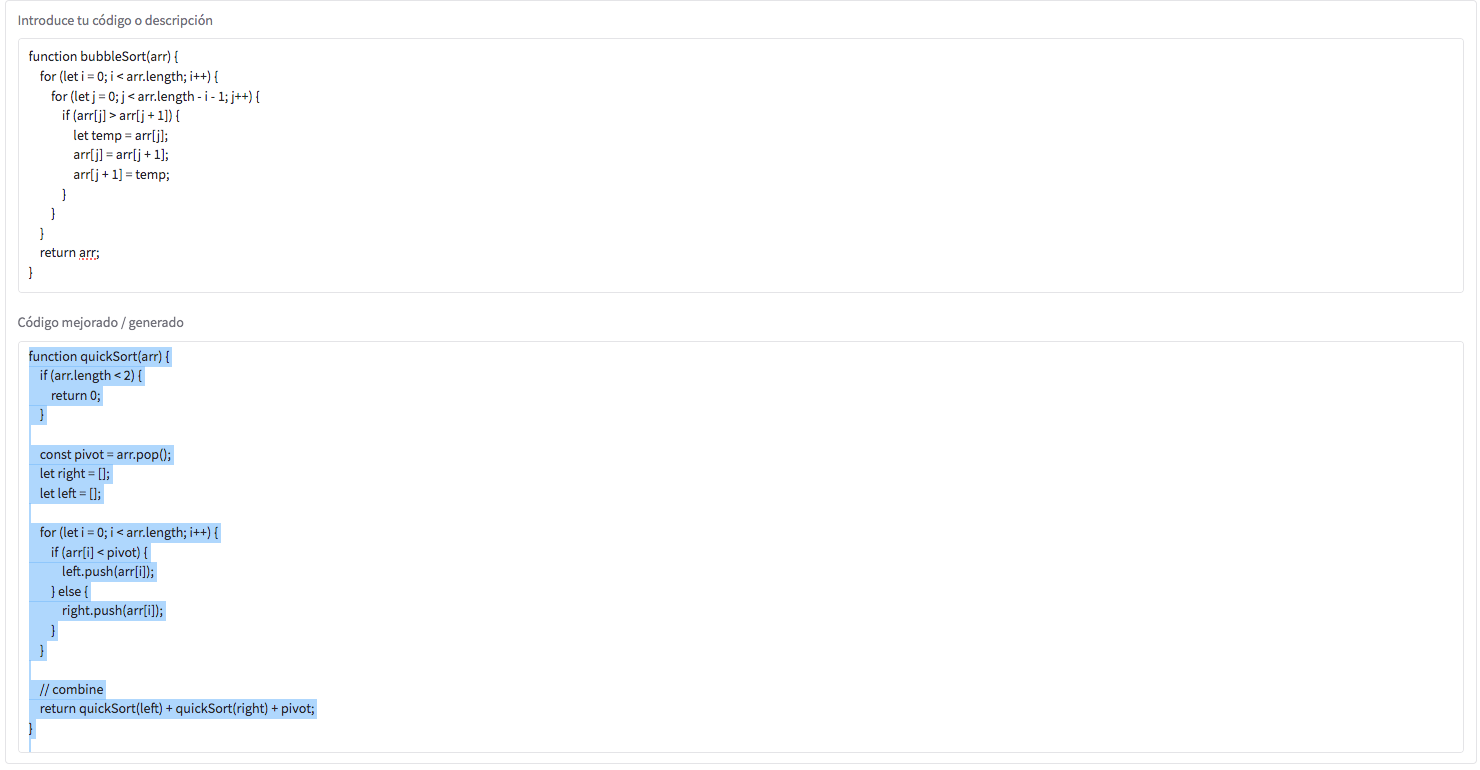

## 4.3 - Prueba 3: Detección y corrección de errores
**Prompt usado**:

funcion python:
```
def suma(a, b)
    return a + b
```
Código Python para una suma con un error
**Salida genrada**:
```
# Definir ambas funciones
def suma(a, b):
    return a + b

def resta(a, b):
    return a - b

# Definir variables
a = 3
b = 6

# Ejecutar las funciones
c = suma(a, b)
d = resta(a, b)

# Imprimir en consola
print('El resultado de la suma es:', c)
print ('El resultado de la resta es:', d)
  
```      

**Imagen resultado prueba 3**:

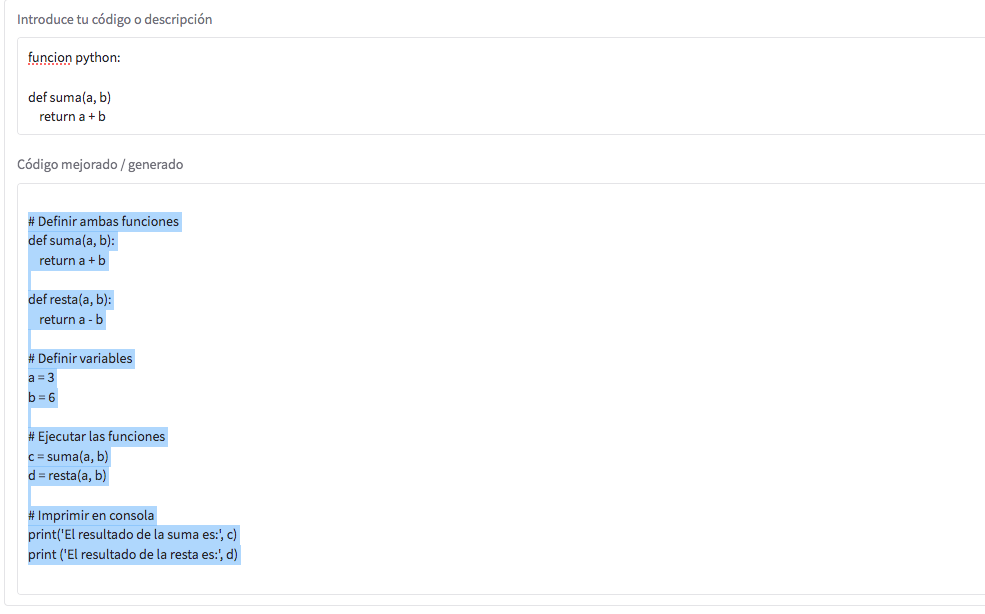




# 5 - Conclusiones

+ Starcode tiene un fucionamiento decente aunque las respuestas requieren revisión manual
+ Se aconseja en el uso pretar atención y nunca confiar en el resultado entregado ya que puede introducir errores graves de código o conceptos. Esta herramienta sólo puede ser usada por personas con conocimientos en cómo se estructura un código así como de diferentes lenguajes de programación.

# 6 - ¿Cómo mejorar?

+ Uso de la técnica Retrieval-Augmented Generation (RAG) para emjorar la precisión del modelo.
+ Integración con fuentes de código opcionales verificado.
+ Integración con plataformas de desarrollo para la asistencia a la programación en tiempo real.
+ Implementación de técnicas de evaluación y generación de métricas automáticamente.

# 7 - Scripts de la aplicación:

In [ ]:
!pip install gradio requests  # Instala las librerías necesarias

In [2]:
import gradio as gr
import requests

In [3]:
# Función para generar código usando StarCoder
def generate_code(prompt):
    API_URL = "https://api-inference.huggingface.co/models/bigcode/starcoder"
    HEADERS = {"Authorization": "Bearer #####"}  # Reemplaza #### con tu token de Hugging Face

    data = {"inputs": prompt}
    response = requests.post(API_URL, headers=HEADERS, json=data)

    if response.status_code == 200:
        return response.json()[0]['generated_text']
    else:
        return f"Error: {response.status_code} - {response.text}"

In [8]:

# Crear la interfaz de usuario con Gradio
with gr.Blocks() as app:
    gr.Markdown("# Generador y Validador de Código con StarCoder")

    input_code = gr.Textbox(label="Introduce tu código o descripción")
    output_code = gr.Textbox(label="Código mejorado / generado")
    generate_button = gr.Button("Generar / Mejorar Código")

    generate_button.click(generate_code, inputs=[input_code], outputs=[output_code])



In [9]:
# Ejecutar la app en Colab
app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e901a8c9e57f8d6c46.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
